In [1]:
!pip install -Uqq fastbook
!pip install gradio

     ---------------------------------------- 14.2/14.2 MB 1.5 MB/s eta 0:00:00
     -------------------------------------- 813.6/813.6 kB 5.1 MB/s eta 0:00:00
     ---------------------------------------- 56.9/56.9 kB ? eta 0:00:00
     -------------------------------------- 202.7/202.7 kB 4.1 MB/s eta 0:00:00
     ---------------------------------------- 71.5/71.5 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 84.5/84.5 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.7/1.7 MB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 55.8/55.8 kB 2.8 MB/s eta 0:00:00
     -------------------------------------- 101.4/101.4 kB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 55.8/55.8 kB 2.8 MB/s eta 0:00:00
     

In [19]:
!pip install numpy==1.23.0

     ---------------------------------------- 14.6/14.6 MB 2.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.1
    Uninstalling numpy-1.24.1:
      Successfully uninstalled numpy-1.24.1


ERROR: Could not install packages due to an OSError: [WinError 5] Erişim engellendi: 'C:\\Users\\csemr\\anaconda3\\envs\\fastaiv2\\Lib\\site-packages\\~umpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



In [12]:
np.__version__

'1.23.0'

In [7]:
import fastai
fastai.__version__

'2.7.10'

In [1]:
from fastbook import *
from fastai.vision.all import *
from fastai.vision.widgets import *
import gradio as gr

In [2]:
class Hook():
  def hook_func(self, m, i, o): self.stored = o.detach().clone()

In [3]:
import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

In [4]:
learn_inf = load_learner("resnet152_fit_one_cycle_freeze_91acc.pkl", cpu=True)

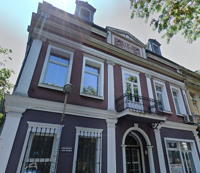

In [5]:
im=PILImage.create("train_val_cropped/train/varna/varna-1-1.jpg")
im.thumbnail((200,200))
im

In [6]:
learn_inf.predict(im)

('varna',
 TensorBase(14),
 TensorBase([4.8675e-15, 2.3854e-11, 4.8504e-13, 4.0559e-15, 3.0774e-16, 5.1172e-10, 2.8746e-15, 4.2985e-15, 1.4453e-15, 9.6458e-14, 1.4895e-13, 1.6175e-13, 4.3671e-16, 4.5302e-15, 1.0000e+00]))

In [7]:
categories = ('arbanasi', 'filibe', 'gjirokoster', 'iskodra', 'kula', 'kuzguncuk', 'larissa_ampelakia', 'mardin', 'ohrid', 'pristina', 'safranbolu', 'selanik', 'sozopol_suzebolu', 'tiran', 'varna')
def classify_img(img):
  pred,idx,probs=learn_inf.predict(img)
  return dict(zip(categories, map(float, probs)))
classify_img(im)

{'arbanasi': 4.867463396452049e-15,
 'filibe': 2.3853884145719206e-11,
 'gjirokoster': 4.850350806759329e-13,
 'iskodra': 4.055933411665439e-15,
 'kula': 3.0773731354219317e-16,
 'kuzguncuk': 5.117247181551932e-10,
 'larissa_ampelakia': 2.8745738072727877e-15,
 'mardin': 4.298488072375286e-15,
 'ohrid': 1.4453161407016542e-15,
 'pristina': 9.645830954720797e-14,
 'safranbolu': 1.4895140784849936e-13,
 'selanik': 1.6175339605066508e-13,
 'sozopol_suzebolu': 4.3671269108000053e-16,
 'tiran': 4.530160900811757e-15,
 'varna': 1.0}

In [8]:
image=gr.inputs.Image(shape=(128,128))
label=gr.outputs.Label()
examples=["train_val_cropped/train/filibe/filibe-1-1.jpg",
          "train_val_cropped/train/ohrid/ohrid-3-1.jpg",
          "train_val_cropped/train/varna/varna-1-1.jpg"]

intf=gr.Interface(fn=classify_img, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False, share=True)

C:\Users\csemr\anaconda3\envs\fastaiv2\lib\site-packages\gradio\inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\csemr\anaconda3\envs\fastaiv2\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\csemr\anaconda3\envs\fastaiv2\lib\site-packages\gradio\outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
C:\Users\csemr\anaconda3\envs\fastaiv2\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7862

Could not create share link, please check your internet connection.


In [19]:
!pip install nbdev

     -------------------------------------- 64.3/64.3 kB 872.3 kB/s eta 0:00:00
     ---------------------------------------- 79.0/79.0 kB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 58.1/58.1 kB 3.2 MB/s eta 0:00:00


In [22]:
import nbdev
nbdev.export.nb_export('gradio.ipynb', 'app')
print('Export successful')

Export successful
